# Real Estate Analysis, King County.

## Business Understanding

### a) Overview
[King County](https://en.wikipedia.org/wiki/King_County,_Washington) is a populous county in Washington state, that is located in the northwestern region of USA. It include Seattle city which is the county seat, and comprises 29% of washington's population,outof the 39 counties in the state, with  56.72% of its population being home owners while 43.28% being. The county is the home various attractions, companies, amenities and opportunities among others. For more demographics and information of the county view this [link](https://www.point2homes.com/US/Neighborhood/WA/King-County-Demographics.html).

Real estate agencies, licensed professional organisations, are the bridge between buyers and sellers of real estate properties. They guide estate buyers and sellers by; providing unbiased insights and advice , manage negotiations on behalf of buyer / seller and keep documentations required for the estate transaction. Real estate agencies usually receive income from sales on commisions made from property sales, which generally rabges between 5-6% of the property's sale price.

### b) Problem Statement
Being part of a real estate agency that guides potential property owners / sellers on the marketing process of their property, through; comprehensive market research and analysis to determine the property's market price, identify the best places to invest resources in improvements, and identify the property's top selling points. 

We will be conducting an analysis of king county property sales data in order to be able to guide potential property owners on the best and most effective way to market their property. This can be achieved through; approximation of the property's market price and identifying crucial areas for improvement while establishing property's top selling points in order to increase the property market price. This is aimed at improving the property transactions completion threshold for the agency, and in return increase sales revenues to the agency through commissions made for the property sales.

### c) Main Objective
To develop a predictive regression model that accurately predicts the sale price of a property while identifying crucial areas for improvement in order to increase property prices. As well as coming up with insights to well describe some property top selling points that are associated with high market prices.

### d)Metrics of Success
Accurately predicting the price of a property based on its feature and outlining key areas that can be acted upon to improve the overall sale price.

### e) Specific Objectives
* Identify house features that collectively correspond to high market prices.
* Develop a regression model to accurately predict the market price of a house based on its features/ properties.
* Evaluate the performance of the model in predicting market prices.
* From the model identify features that can be improved to increase the house price

## Data Understanding
***
The dataset used in this project, `kc_house_data.csv` data, contains information/ properties of houses sold in King county region within the year 2014 and 2015. It contains `21597rows` and `20 columns`, with the columns description as below;
* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
    * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
* `view` - Quality of view from house
    * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
    * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each condition code
* `grade` - Overall grade of the house. Related to the construction and design of the house.
    * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each building grade code
* `sqft_above` - Square footage of house apart from basement
* `sqft_basement` - Square footage of the basement
* `yr_built - Year` when house was built
* `yr_renovated` - Year when house was renovated
* `zipcode` - ZIP Code used by the United States Postal Service
* `lat` - Latitude coordinate
* `long` - Longitude coordinate
* `sqft_living15` - The square footage of interior housing living space for the nearest 15 neighbors
* `sqft_lot15` - The square footage of the land lots of the nearest 15 neighbors

The project also use `City Names.csv` dataset webscaped from the [Zipcode website ](https://www.zipcode.com.ng/2022/06/list-of-washington-zip-codes.html). `City Names.csv` dataset, contains zipcode names for king county zipcodes contained in the `kc_house_data.csv` dataset, . The dataset has `500 rows` and `4 columns` namely **City ,zipcode, County and State**.

In [1]:
# importing all necessary modules

import numpy as np
import pandas as pd
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.stats.diagnostic import linear_rainbow
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor

# plottings 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')

In [2]:
#loading the `kc_house_data.csv` dataset
housing_df=pd.read_csv("data/kc_house_data.csv", index_col=0)

#previewing the structure of our data
print(housing_df.shape)
housing_df.head()

(21597, 20)


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
# vewing years from the date column
housing_df.date.map(lambda x: x[-4:]).unique()

array(['2014', '2015'], dtype=object)

In [4]:
# previewing the structure of our variables
housing_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


The **average house price** in our dataset is **$ 540297 USD** , the **average** number of **bedrooms: 3** , **average** number  of **bathrooms: 2**, the **average** living space in **square foot: 2080** and **average floor**s being: **2**.

In [5]:
#loading the city names dataset 

zipcode_names=pd.read_csv('data/City Names.csv')
print(zipcode_names.shape)
zipcode_names.head()

#the web scrapping code in the appendix 

(500, 4)


,City,zipcode,County,State
0,Benge,99105,Adams,Washington
1,Ritzville,99169,Adams,Washington
2,Lind,99341,Adams,Washington
3,Othello,99344,Adams,Washington
4,Washtucna,99371,Adams,Washington


## Data Preparation
***
In this section, we will merge the two datasets and perform data cleaning to prepare them for analysis, the various data cleaning methods that are to be used will be;

 <p> &#9672 Converting columns into the requires data type </p>
<p> &#9672  Checking and removing duplicates</p> 
 <p> &#9672 Dealing with missing data and placeholders of missing data  </p>
 <p> &#9672 Removing outliers </p>

In [6]:
#mergeing the housing_df with the zipcode_names dataframe to obntain the city names

housing=housing_df.merge(zipcode_names,how='left' , on='zipcode')
housing.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,City,County,State
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,...,1955,0.0,98178,47.5112,-122.257,1340,5650,Seattle,King,Washington
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,Seattle,King,Washington
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,...,1933,NaN,98028,47.7379,-122.233,2720,8062,Kenmore,King,Washington
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,...,1965,0.0,98136,47.5208,-122.393,1360,5000,Seattle,King,Washington
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,...,1987,0.0,98074,47.6168,-122.045,1800,7503,Sammamish,King,Washington


In [7]:
# dropping all un-required columns
housing.drop([ 'zipcode', 'lat', 'long','County', 'State','date','yr_renovated' ], axis=1, inplace=True)
housing.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'sqft_living15', 'sqft_lot15', 'City'],
      dtype='object')

In [8]:
# checking the structure of our columns
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 0 to 21596
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     19221 non-null  object 
 7   view           21534 non-null  object 
 8   condition      21597 non-null  object 
 9   grade          21597 non-null  object 
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  object 
 12  yr_built       21597 non-null  int64  
 13  sqft_living15  21597 non-null  int64  
 14  sqft_lot15     21597 non-null  int64  
 15  City           21597 non-null  object 
dtypes: float64(3), int64(7), object(6)
memory usage: 2.8+ MB


In [9]:
# converting the sqft_basement column into type float
housing.sqft_basement=housing.sqft_basement.str.replace('?', '0').map( lambda x: float(x))
housing.sqft_basement.dtypes

C:\Users\User\AppData\Local\Temp\ipykernel_13244\2400237054.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  housing.sqft_basement=housing.sqft_basement.str.replace('?', '0').map( lambda x: float(x))


dtype('float64')

In [10]:
# splitting the grade column
print(housing.grade.unique())

# creating a new column 'grade_num' to assign the numeric values of the grade column
housing["grade_num"]=housing.grade.map(lambda x: int(x[:2]))
housing["grade"]=housing.grade.map(lambda x: str.strip(x[2:]))

# confirming our changes
print('\n',housing.grade.unique())

['7 Average' '6 Low Average' '8 Good' '11 Excellent' '9 Better' '5 Fair'
 '10 Very Good' '12 Luxury' '4 Low' '3 Poor' '13 Mansion']

 ['Average' 'Low Average' 'Good' 'Excellent' 'Better' 'Fair' 'Very Good'
 'Luxury' 'Low' 'Poor' 'Mansion']


In [11]:
# checking for columns with missing values
housing.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
sqft_living15       0
sqft_lot15          0
City                0
grade_num           0
dtype: int64

In [12]:
# droping rows with missing values in waterfront and view columns 
# since they only contain a small proportion of missing data
housing.dropna(subset=['waterfront','view'], axis=0, inplace=True)

In [13]:
# checking for duplicates
print(f"Duplicates: {(housing.duplicated().sum())}" )

#removing duplicated rows
housing.drop_duplicates(inplace=True)

# confirming our changes
print(f"Duplicates: {housing.duplicated().any()}")

Duplicates: 5


False

In [14]:
# checking for missing values inform of placeholders in the categorical columns
for col in housing.select_dtypes('object').columns:
    print(col,': ',housing[col].unique(), '\n')

waterfront :  ['NO' 'YES'] 

view :  ['NONE' 'GOOD' 'EXCELLENT' 'AVERAGE' 'FAIR'] 

condition :  ['Average' 'Very Good' 'Good' 'Poor' 'Fair'] 

grade :  ['Average' 'Low Average' 'Good' 'Excellent' 'Better' 'Fair' 'Very Good'
 'Luxury' 'Low' 'Poor' 'Mansion'] 

City :  ['Seattle' 'Kenmore' 'Sammamish' 'Redmond' 'Federal Way' 'Maple Valley'
 'Duvall' 'Auburn' 'Mercer Island' 'Kent' 'Issaquah' 'Renton' 'Bellevue'
 'Vashon' 'Kirkland' 'Black Diamond' 'North Bend' 'Woodinville' 'Enumclaw'
 'Fall City' 'Bothell' 'Snoqualmie' 'Carnation' 'Medina'] 



In [15]:
#creating a function that removes outliers
def outlier(data,columns: list):
    """ Function takes in a dataframe and list of columns.
    The columns are then trimmed by removing outlier"""
    
    df = data.loc[:, columns]                      # selecting only the passed columns data 
    for col in columns:                            # looping over the columns
        q75,q25 = np.percentile(df[col],[75,25])   # calculating 25th and 75 percentile for each column
        iqr = q75-q25                              # calculating the interquartile range
        upper_bound = q75+(1.5*iqr)                # creating a lower bound for outlier
        lower_bound = q25-(1.5*iqr)                # creating an upper bound for outlier

        df = df[df[col].between(lower_bound, upper_bound, inclusive="both")] #selecting rows that are between the bounds
        
    return data.loc[df.index]  #returning a dataframe of indexes/rows that are not outliers from each column

# selecting numerical columns to drop outliers
column_list = housing.select_dtypes('number').columns
# calling the function to remove outliers
housing=outlier(housing, column_list)  

In [16]:
# desriptive statistics of our data
housing.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,grade_num
count,1.403500e+04,14035.000000,14035.000000,14035.000000,14035.000000,14035.000000,14035.000000,14035.000000,14035.000000,14035.000000,14035.000000,14035.000000
mean,4.448609e+05,3.244460,1.969523,1793.779907,6850.571785,1.463840,1555.663270,232.789669,1969.405201,1778.959601,6737.255077,7.368721
std,1.842164e+05,0.765987,0.650646,582.130496,3190.174601,0.546759,558.285026,348.442434,29.857663,476.864106,2818.001330,0.792712
min,8.200000e+04,2.000000,0.500000,560.000000,520.000000,1.000000,480.000000,0.000000,1900.000000,620.000000,651.000000,6.000000
25%,3.030000e+05,3.000000,1.500000,1350.000000,4609.000000,1.000000,1140.000000,0.000000,1950.000000,1428.000000,4750.000000,7.000000
50%,4.130000e+05,3.000000,2.000000,1740.000000,6900.000000,1.000000,1430.000000,0.000000,1969.000000,1700.000000,7000.000000,7.000000
75%,5.501425e+05,4.000000,2.500000,2190.000000,8800.000000,2.000000,1880.000000,470.000000,1996.000000,2080.000000,8583.000000,8.000000
max,1.120000e+06,5.000000,4.000000,3940.000000,17859.000000,3.500000,3216.000000,1250.000000,2015.000000,3150.000000,14675.000000,9.000000


After data preparation the averages in the data become;
* **average house price**: **$ 444,861 USD** 
* **average** number of **bedrooms: 3** 
* **average** number  of **bathrooms: 2**
* the **average** living space: **1794 square foot** 
* **average floor**s being: **2**.
* **average basement** space: **233 square foot**
* **average grade**, construction and design quality of the house:**Average** 

## Data Analysis
***
### 1. Exploratory Data Analysis
Examining the patterns in the individual attributes through visualisations and their relations with the house price attribute

### a) Categorical Variables
We will examine the relationship between the categorical columns and the price column.

In [17]:
# categorical columns in our dataset
categorical_cols=housing.select_dtypes('object').columns
categorical_cols

Index(['waterfront', 'view', 'condition', 'grade', 'City'], dtype='object')

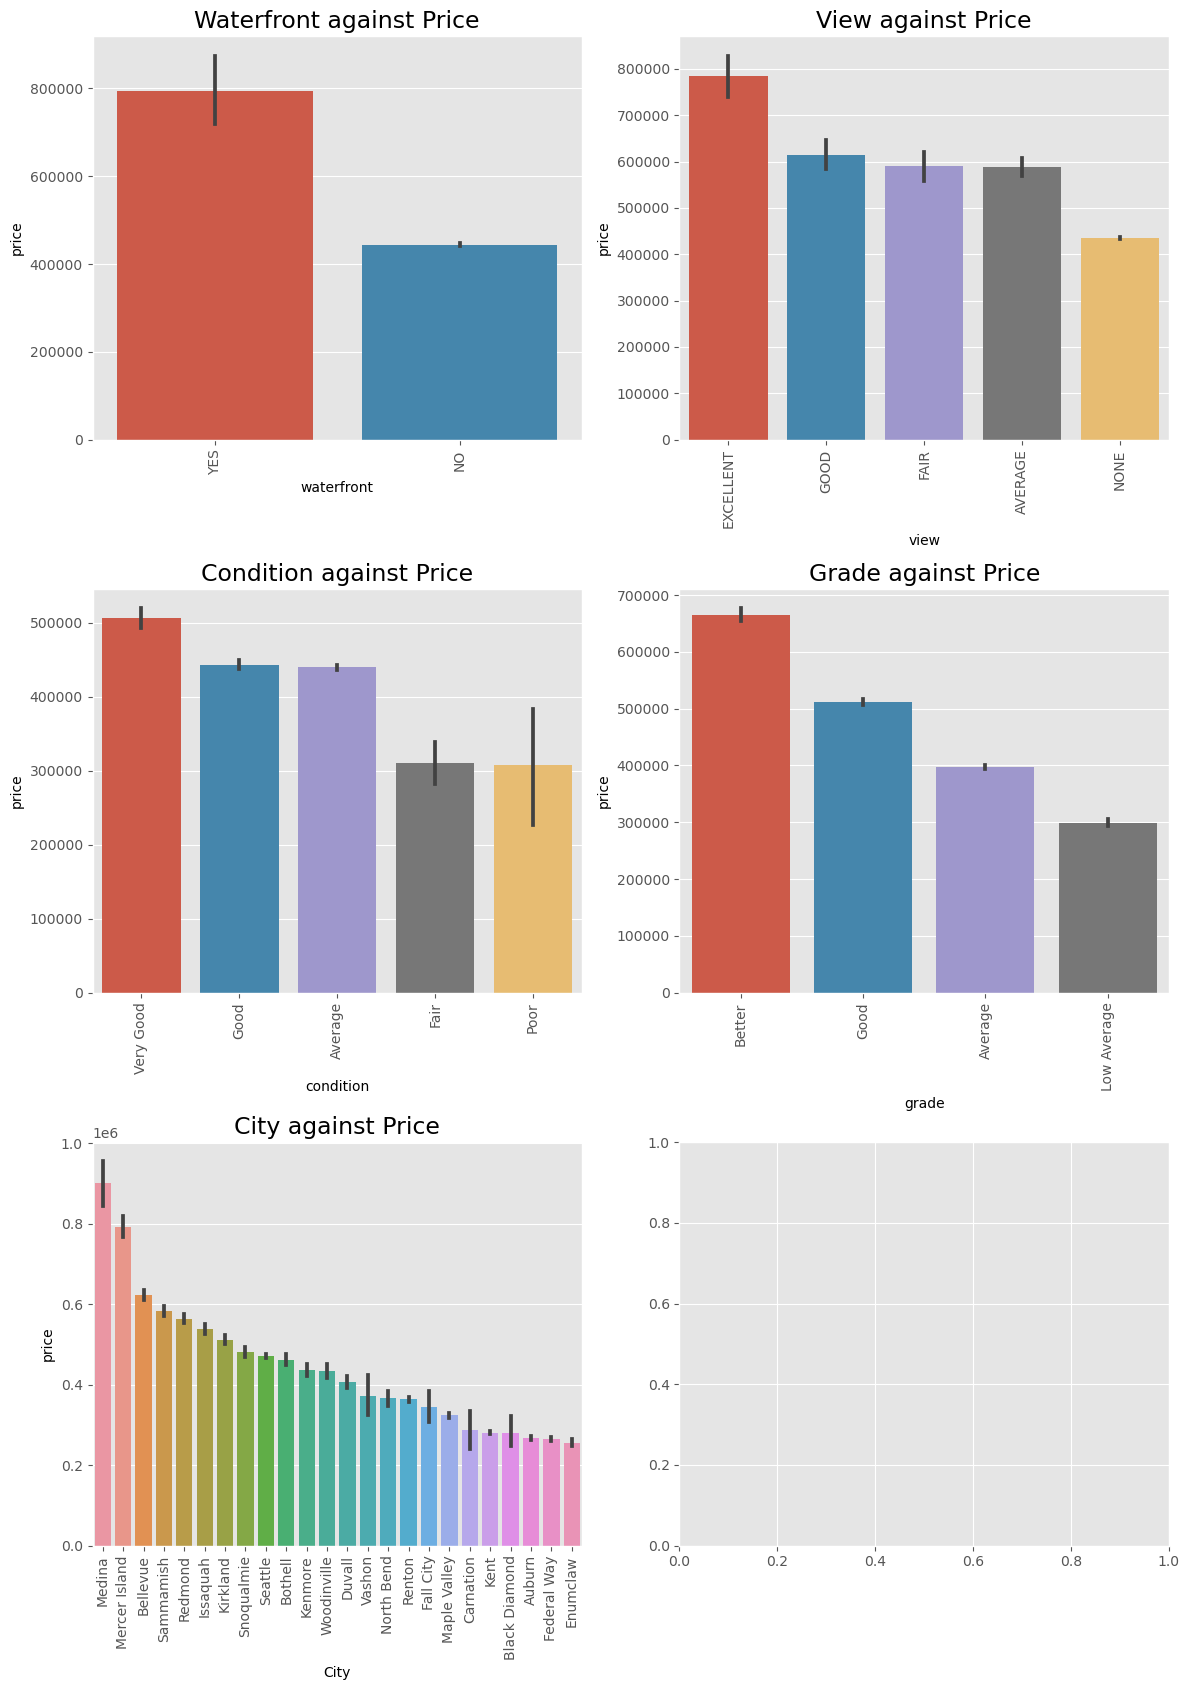

In [18]:
# plotting the categorical columns and their average price per category

#creating the axes and seting the plot sizes
fig , axes=plt.subplots(nrows=3, ncols=2,figsize=(12,17))
plt.style.use("ggplot")

for index,col in  enumerate(categorical_cols):  # looping over the columns
    ax=axes[index//2][index%2]                  # setting the axis
    
    #sorting data according to price in descending order
    sorted_categories = housing.groupby(col)['price'].mean().sort_values(ascending=False).index
    
    #barplot of the column against price in descending order
    sns.barplot(x=col, y='price', data=housing, order=sorted_categories,ax=ax)
    ax.set_title(f"{str.capitalize(col)} against Price", fontsize='17') #setting title
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)               #rotating the x axis labes for visibility
    plt.tight_layout()
plt.show();

From this plots, we conclude that;
* Houses on a `water front`, that is houses around lakes, rivers and canals, generally more expensive fetch high house prices then those that don't.
* Houses with `Excellent view` from house,  Mountains, Cascades, ake / river / creek, and others, have higher prices.
* Houses in a `very good condition`, well maintained and renovated ,  have high market prices.
* Houses with a `Better grade` , construction interms of interior and exteriour design, correspond to high prices
* House `locations` such as houses from  `Medina`, `Merce Island` and `Bellevue` , are generally more expensive than those frome the other locations/cities. This can be due to the fact that, the above cities are all close Seattle the city capital and they posses waterfront properties, and scenic views that as discussed above fetch high market prices for houses.

### b) Numeric Variables
We will examine the relationship between the numeric columns and the price column.

In [27]:
# selecting all the numeric columns
numeric_cols=housing.select_dtypes('number')
numeric_cols.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'sqft_above', 'sqft_basement', 'yr_built', 'sqft_living15',
       'sqft_lot15', 'grade_num'],
      dtype='object')

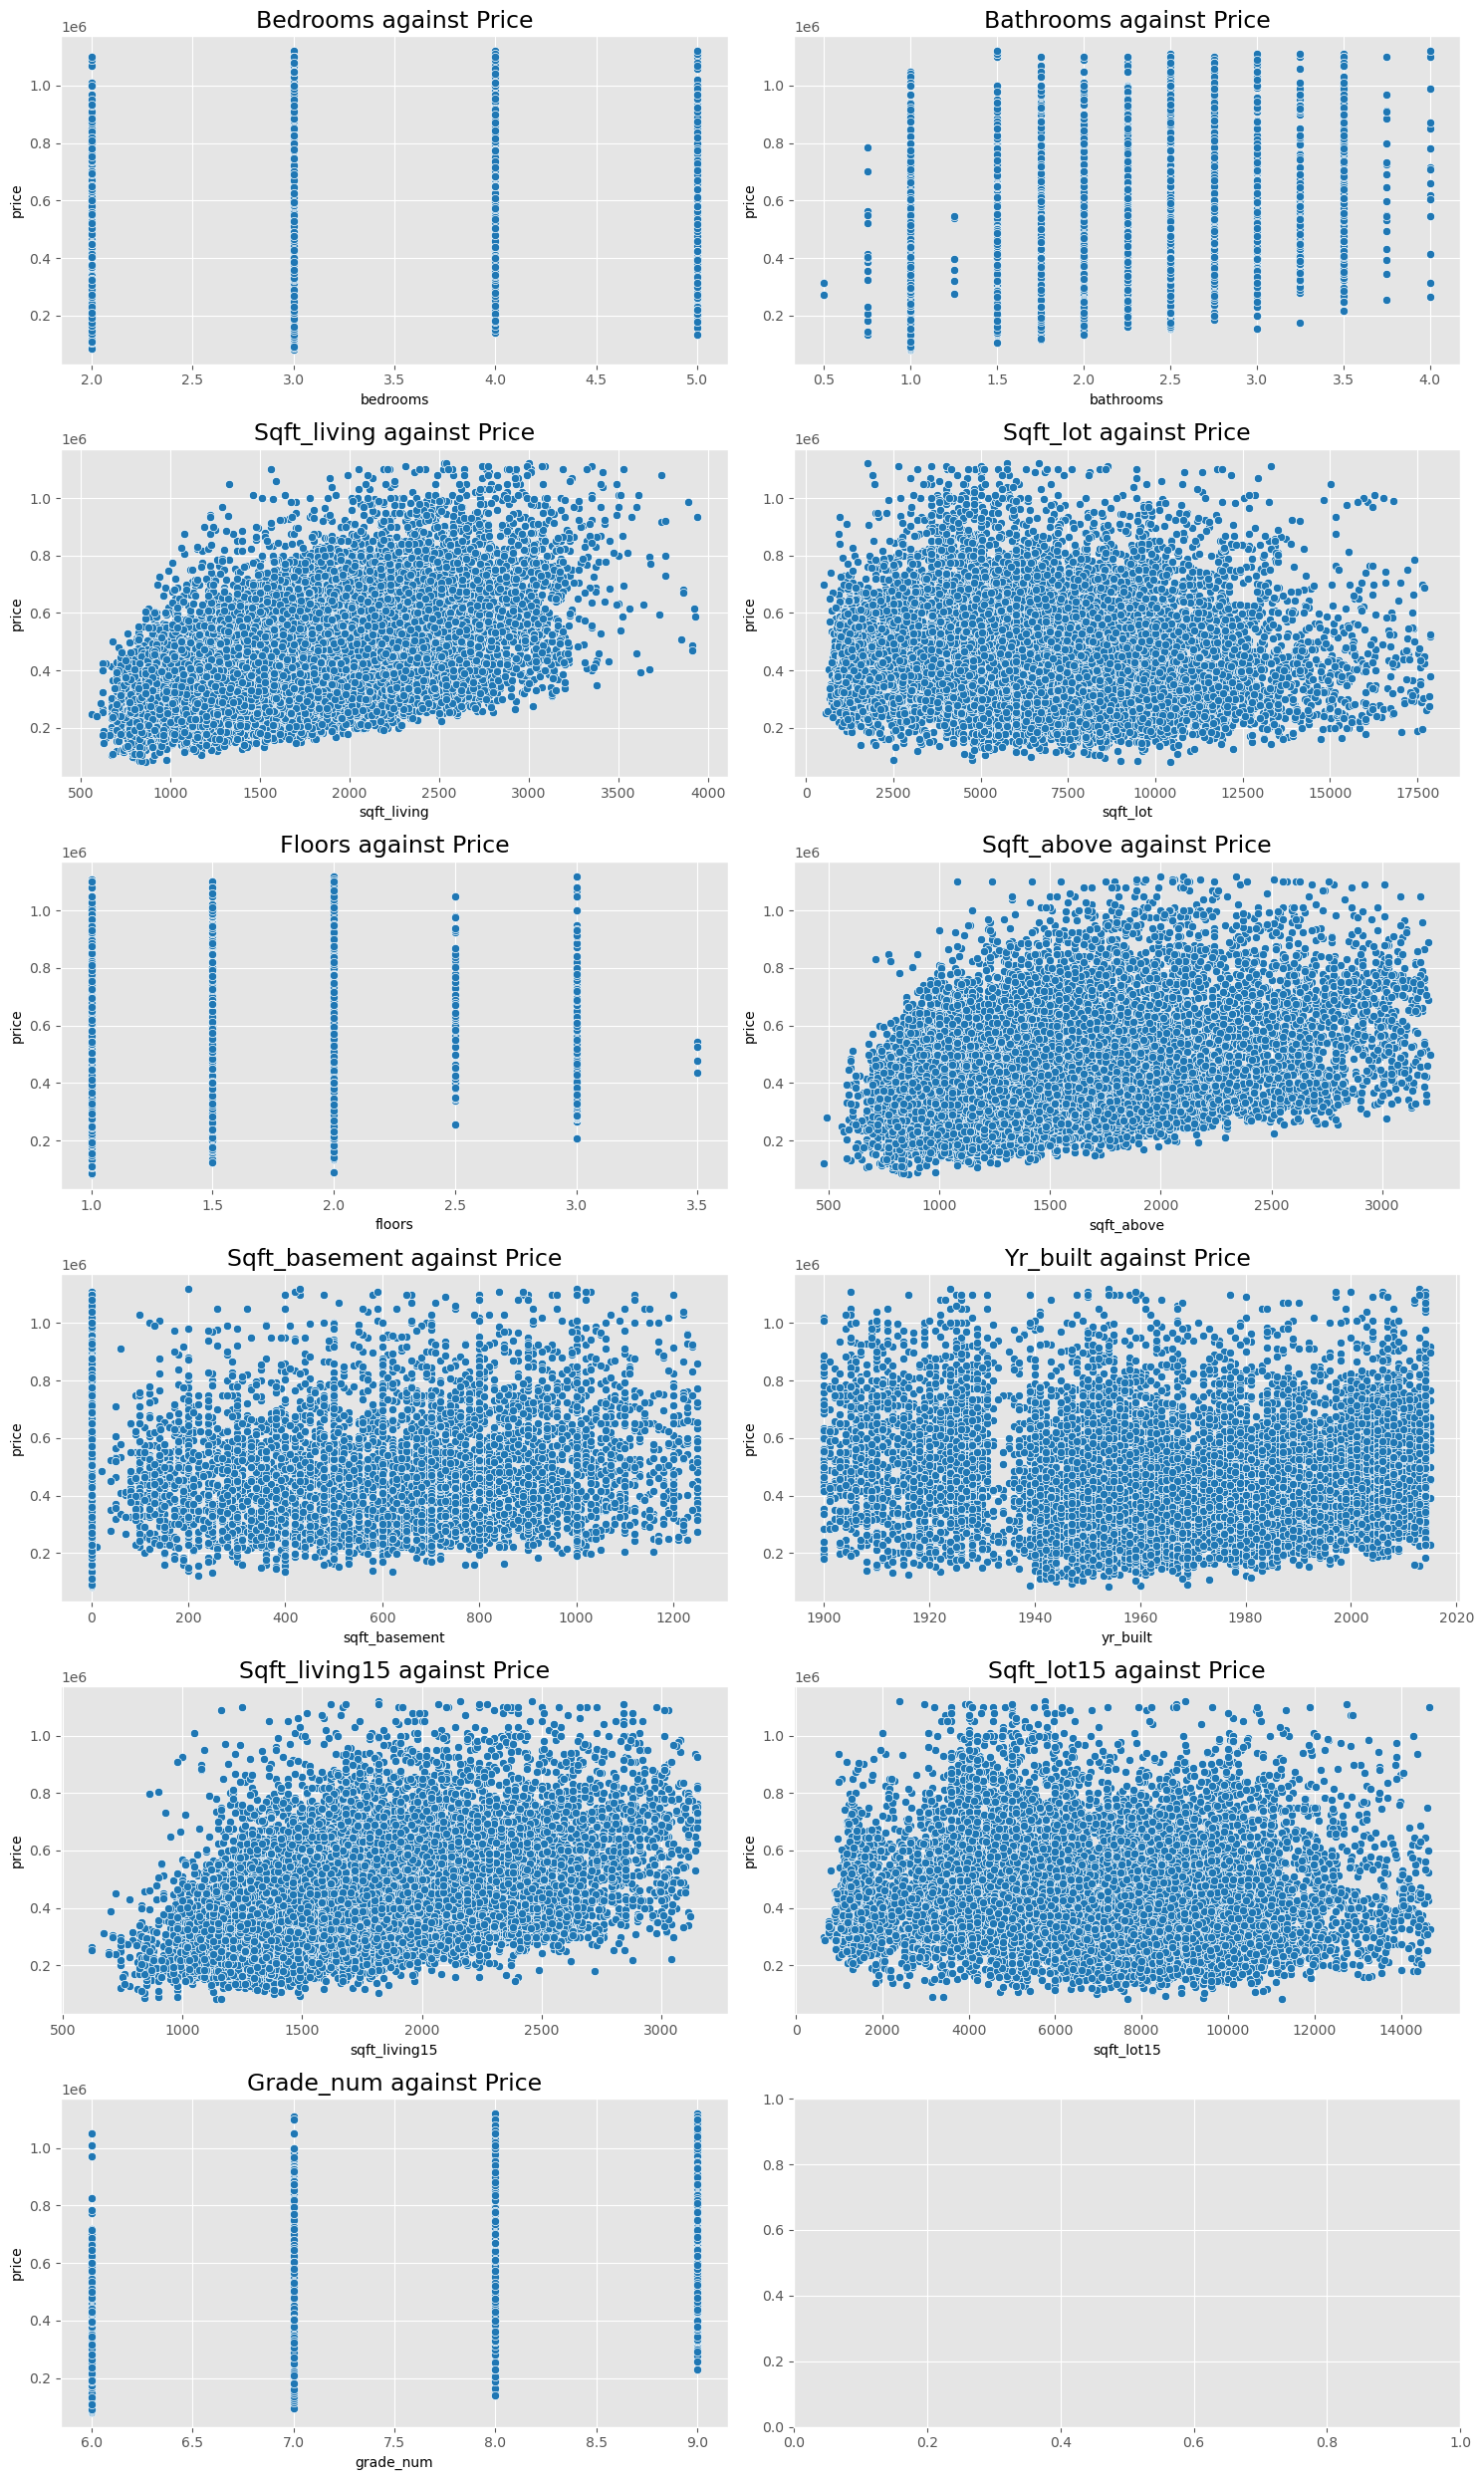

In [23]:
# plotting the numeric columns against the price column

#creating the axes and seting the plot sizes
fig , axes=plt.subplots(nrows=6, ncols=2,figsize=(15,25))
plt.style.use('ggplot')

for index,col in  enumerate(numeric_cols.columns[1:]): #looping over the numeric columns excluding price column
    
    ax=axes[index//2][index%2]   # iterating over the axis

    #scatter plot of the column against price
    sns.scatterplot(x=col, y='price', data=housing , ax=ax , color="tab:blue") #the scatter plot
    ax.set_title(f"{str.capitalize(col)} against Price", fontsize='17') #setting title
    plt.tight_layout()
plt.show();
    

From the graphs, we see that;
* The following columns `sqft_living`, `sqfl_above` , `bedrooms`, `bathrooms`, `sqft_living15`  and `floors` all seem have a linear relationship with price,  even though the individual correlation/ strength of the relationship with price column are different.
* `sqft_living`, `sqfl_above` and `sqft_living15` seem to have the highest correlation with price while `sqft_lot` , `sqft_lot15` and `yr_built` seem to have low to no linear re;ationship with price

### 2. Modelling
### a) Baseline Model
We will create a baseline model that predicts the house price based on the most correlated variables with price  and the identify how the features explain price and by what amount. Then we will identify the feature that has the highers impact on price of a house.

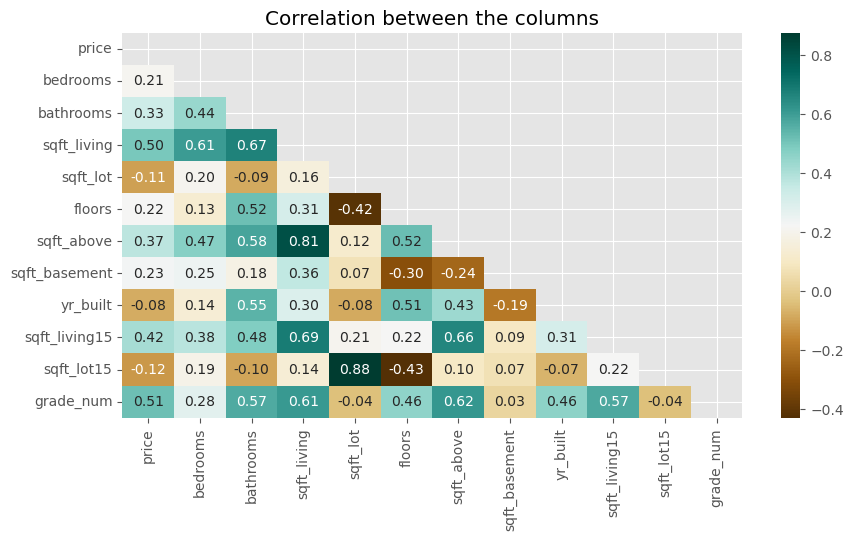

In [28]:
#correlation heatmap to observe the correlations between the independent variable

plt.figure(figsize=(10,5))
mask = np.triu(np.ones_like(numeric_cols.corr(), dtype=bool)) # creating an upper triangular matrix

# creating a heatmap and using the upper traingular to remove duplictes
sns.heatmap(numeric_cols.corr(),annot=True,cmap="BrBG",fmt=".2f", mask=mask) 
plt.title('Correlation between the columns')
plt.show();


The output above concurrs with the results from the scatter plots above, where `grade_num` , `sqft_living`and `sqft_living15` have the highest correlation with price followed by `sqft_above`, `bathrooms`,  ,`sqft_basement` , `bedrooms`and `floors`. Also, from this correlation heatmap, the following variables are highly correlated;
* `sqft_above` , `sqft_living` : 0.81

Therefore, selecting one inorder to avoid multicolinearity; hence out baseline model will have the following variables because of their high correlation with price:
> <font color= #C0392B > grade_num , sqft_living , sqft_living15 , bathrooms , sqft_basement , bedrooms `and` floors </font>

In [57]:
#building the baseline model

y=housing.price

#droping columns with very low correlation with price
X=numeric_cols.drop(['price','sqft_lot' , 'sqft_lot15', 'yr_built', 'sqft_above'], axis=1)


model_baseline=sm.OLS(y,sm.add_constant(X)).fit()
model_baseline.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.352
Method:                 Least Squares   F-statistic:                     1092.
Date:                Sat, 08 Jul 2023   Prob (F-statistic):               0.00
Time:                        17:58:05   Log-Likelihood:            -1.8702e+05
No. Observations:               14035   AIC:                         3.741e+05
Df Residuals:                   14027   BIC:                         3.741e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.085e+05   1.39e+04    -22.132      0.000   -3.36e+05   -2.81e+05
bedrooms      -1.788e+04   2097.350     -8.527      0.000    -2.2e+04   -1.38e+04
bathrooms     -3.882e+04   2969.128    -13.073      0.000   -4.46e+04    -3.3e+04
sqft_living      82.5471      4.363     18.919      0.000      73.995      91.100
floors         3.087e+04   3172.825      9.730      0.000    2.47e+04    3.71e+04
sqft_basement    99.8014      4.591     21.739      0.000      90.803     108.800
sqft_living15    34.2003      3.888      8.796      0.000      26.579      41.822
grade_num      8.285e+04   2261.900     36.631      0.000    7.84e+04    8.73e+04
==============================================================================
Omnibus:                      906.499   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1117.005
Skew:                           0.632   Prob(JB):                    2.79e-243
Kurtosis:                       3.560   Cond. No.                     2.97e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.97e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**The above model and its parameters are significant at an alpha of 0.01, where the model explains 35% of the variations in price**. We then plot the partial regression plots to visualize the addition information added to the model by each feature given that all the other features are in the model.

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


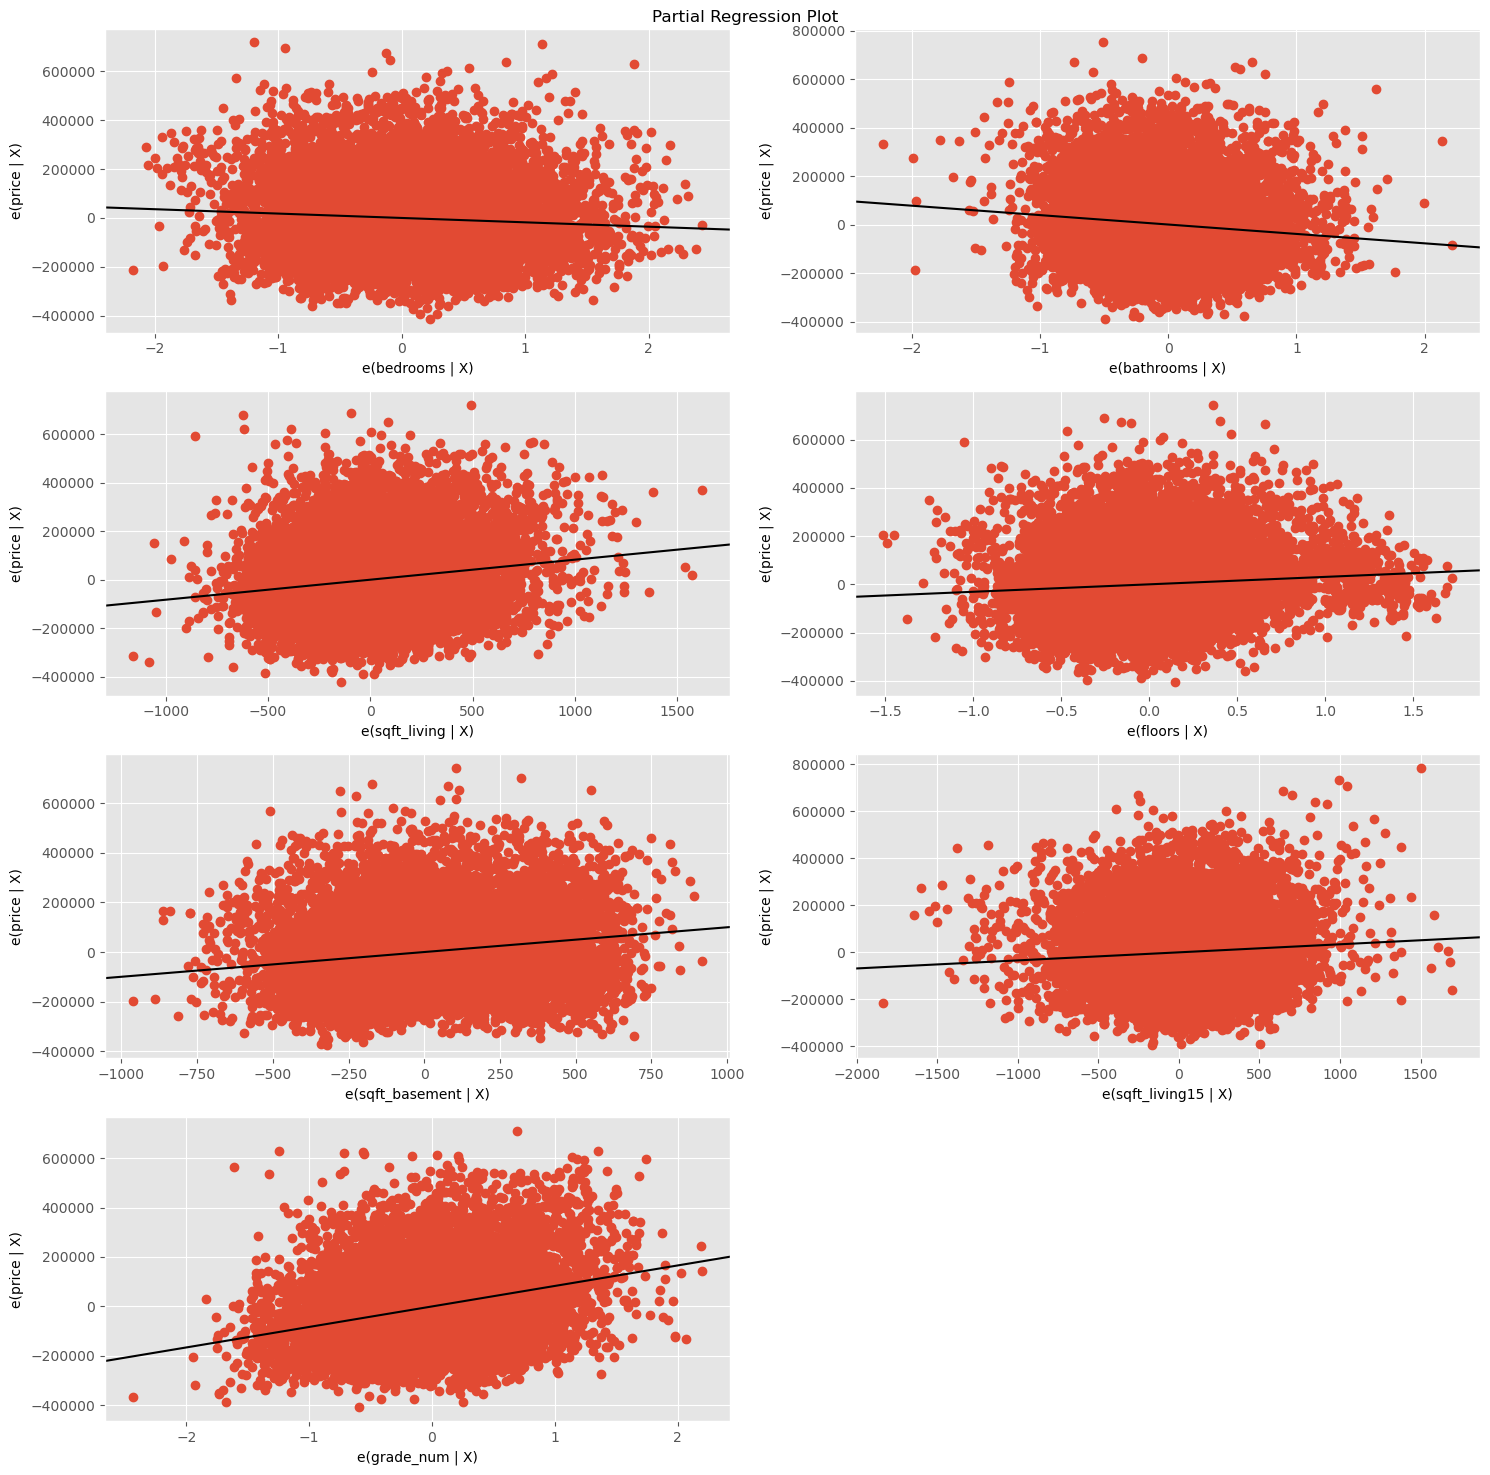

In [58]:
# plotting the partial regression plots
fig = plt.figure(figsize=(15,15))
sm.graphics.plot_partregress_grid(model_baseline, exog_idx=list(X.columns), fig=fig )
plt.tight_layout()
plt.show;

From the partial regression plots above we can see that; 
* All the variables are all having marginal contribution to the model given the other feature variables in the model.
* `sqft_living15` is adding a very small variations to the model, therefore we remove them from our model. 

In [60]:
# rebuilding the model by droping the insignificant features
X_new=X.drop(['sqft_living15'], axis=1)

model_baseline=sm.OLS(y,sm.add_constant(X_new)).fit()

print(f"R-squared: {np.round(model_baseline.rsquared*100)}")
print('\n',model_baseline.params,'\n')

# calculating Mean Absolute Error
mae = model_baseline.resid.abs().sum() / len(y)
print(f'MAE: ',mae)

# calculating Root Mean Square Error
rmse = ((model_baseline.resid ** 2).sum() / len(y)) ** 0.5
print(f'RMSE: ',rmse)

R-squared: 35.0

 const           -307886.711808
bedrooms         -18564.461834
bathrooms        -37731.105927
sqft_living         101.060094
floors            25548.257744
sqft_basement        90.094982
grade_num         87890.448125
dtype: float64 

MAE:  117521.75076797952
RMSE:  148607.10336345714


After droping the unsignificant feature, our model's r-squared becomes 34% which is almost same as the previouse model's r-squared of 35%.
Interprating the model coefficients;

* As we increase the number of bedrooms by 1, the house price drops by `$18,564` USD.
* As we increase the number of bathrooms by 1, the house price drops by `$37,731` USD.
* As we increase the living space in the home by 1 square foot the price will rise by `$101` USD.
* As the house floors increase by one, the house price increases by `$25,548` USD.
* As we increase the space of the basement by 1 square foot the price increases by `$90` USD. 
* As the grade, construction quality of the house, increases by 1 level we see a corresponding increase in price by `$87,890` USD. 

Using the root mean square error , **our model is off by $148,607 USD in a given prediction**.

In [61]:
# zero centering the independent variables for intercept interpratability
X_centered=pd.DataFrame()

for col in X_new.columns:    
    X_centered[col] = X_new[col] - X_new[col].mean()    #looping over the columns and subtracting mean from each column value
    
model_centered=sm.OLS(y,sm.add_constant(X_centered)).fit()
print(f"R-squared: {np.round(model_centered.rsquared*100)}")
print(model_centered.params)

R-squared: 35.0
const            444860.876737
bedrooms         -18564.461834
bathrooms        -37731.105927
sqft_living         101.060094
floors            25548.257744
sqft_basement        90.094982
grade_num         87890.448125
dtype: float64


After zero-centering out feature variable: 
* The house price of a house with `3` bedhrooms, `2` bathrooms ,`1,794 sqft ` square feet of living space, `2 ` floors,`233 sqft ` square feet of space of basement and `Average` grade is estimated to be: `$444,860` USD.
* As we increase number of bedrooms by one from 3 , house price drops by `$18,564` USD.
* As we increase number of bathrooms by one from 2 , house price drops by `$37,731` USD.
* As we increase living space by 1 square foot from 1,974 , house price increase by `$101` USD.
* As we increase number of floors by one from 2 , house price increases by `$25,548` USD.
* As we increase basement space by 1 square foot from 233 sqft , house price increase by `$90` USD.
* As the house grade rises form Average by one level upwards, house price increase by `$8,7890` USD.

In [63]:
# standardising the coeffiecints to determine the variable with the highest impcat on price

# By multiplying each parameter coefficient by the standars deviation of the feature 
# we get the standardized coefficints
for col in model_baseline.params[1:].index:
    std=X_new[col].std()
    print(f"{col}: {model_baseline.params[col]*std}")

bedrooms: -14220.138655967494
bathrooms: -24549.58114679495
sqft_living: 58830.16260721731
floors: 13968.7385269325
sqft_basement: 31392.914784132434
grade_num: 69671.85555644942


From the above standardized coefficients,
> <font color= #C0392B > **`grade` has the most positive impact on the house price followed by `sqft_living`, `sqft_basement` then `floors`** </font>.
    
> <font color= #C0392B > **`bathrooms` has the most negative on house price followed by `bedrooms`** </font>.

### b) Final Model
In this model, we will add the categorical variables that have a relationship with price into our baseline model and evaluate if it performs better than the base model. From EDA we identified that `waterfront1`, `view` and `condition` have a relationship with price, therefore we will add them to our model. 

In [64]:
# selecting the categorical columns from our housing dataframe
categorical=housing[['waterfront', 'view', 'condition']]
categorical

# joining the categorical columns with our baseline  model features
X_final=pd.concat([X_centered,categorical],axis=1)

#creating dummy variables for the categorical column
X_final=pd.get_dummies(data=X_final, columns=list(categorical.columns),sparse=False, drop_first=False , dtype=int )

# the we explicitly drop the refrence categories to avoid multicolinearity
X_final.drop(['waterfront_NO','view_NONE','condition_Poor'], axis=1,inplace=True)
X_final

,bedrooms,bathrooms,sqft_living,floors,sqft_basement,grade_num,waterfront_YES,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD,condition_Average,condition_Fair,condition_Good,condition_Very Good
1,-0.24446,0.280477,776.220093,0.53616,167.210331,-0.368721,0,0,0,0,0,1,0,0,0
2,-1.24446,-0.969523,-1023.779907,-0.46384,-232.789669,-1.368721,0,0,0,0,0,1,0,0,0
3,0.75554,1.030477,166.220093,-0.46384,677.210331,-0.368721,0,0,0,0,0,0,0,0,1
4,-0.24446,0.030477,-113.779907,-0.46384,-232.789669,0.631279,0,0,0,0,0,1,0,0,0
6,-0.24446,0.280477,-78.779907,0.53616,-232.789669,-0.368721,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,-0.24446,0.530477,-483.779907,0.53616,-102.789669,0.631279,0,0,0,0,0,1,0,0,0
21592,-0.24446,0.530477,-263.779907,1.53616,-232.789669,0.631279,0,0,0,0,0,1,0,0,0
21593,0.75554,0.530477,516.220093,0.53616,-232.789669,0.631279,0,0,0,0,0,1,0,0,0
21594,-1.24446,-1.219523,-773.779907,0.53616,-232.789669,-0.368721,0,0,0,0,0,1,0,0,0


In [88]:
# building the second model
model_final=sm.OLS(y,sm.add_constant(X_final)).fit()
print(model_final.summary())

rmse_f=np.mean(model_final.resid**2)**0.5
print()
print("RMSE: ",rmse_f)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     599.3
Date:                Sat, 08 Jul 2023   Prob (F-statistic):               0.00
Time:                        19:39:08   Log-Likelihood:            -1.8660e+05
No. Observations:               14035   AIC:                         3.732e+05
Df Residuals:                   14019   BIC:                         3.733e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4.236e+05    

**The final model is much better than the the baseline as it explains 37% of variations in price** as compared to 35% in the baseline model. Also using the root mean square error , **our model is off by  `$143,789` USD in a given prediction** which is better than the baselines root mean square error of $148,607.

**The model is statistically significant at an alpha of 0.05**. All the model parameters are statistically significant given an alpha level of 0.05 except `condition_Average` , `condition_Fair` and `condition_Good` which are insignificant and should be droped from the model.

Interprating model coefficinets of thr added categorical columns;
* The house price of a house on a `waterfront` is `$104,200` as compared with one that is not.

* The house price of a house with an `Average` view is `$88,000` as compared without a view.

* The house price of a house with an `Excellent` view is `$213,700` as compared without a view.

* The house price of a house with an `Fair` view is `$89,050` as compared without a view.

* The house price of a house with an `Good` view is `$85,080` as compared without a view.

* The house price of a house with a `Very Good` condition is `$98,780` as compared to a poor condition

#### Evaluating model assumptions


In [75]:
# Testing multicollineality

# calculate VIF

def calc_vif(X):
    # calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return vif
calc_vif(X_final)

,variables,VIF
0,bedrooms,1.657816
1,bathrooms,2.398699
2,sqft_living,3.177823
3,floors,1.913494
4,sqft_basement,1.573276
5,grade_num,1.946777
6,waterfront_YES,1.326924
7,view_AVERAGE,1.052735
8,view_EXCELLENT,1.337697
9,view_FAIR,1.024406


Since all the variables have a VIF lesser than 5, then **there is not Multicollinearity in our model**.

In [68]:
# check assumption of linear relashionship between the target and the predictor variable
l_stat,l_pvalue=linear_rainbow(model_final)
# testing for normality assumption using the linear rainbow test
print(f" linear relationship pvalue: {l_pvalue}")
#ho : linear relastionship exists

 linear relationship pvalue: 0.8953565487289483


Since the p-value is larger that an alpha of 0.05, we fail to reject the null hypothesis and conclude that **there is a linear relationship between the response and the predictor variables**

Normality of errors pval:  0.0


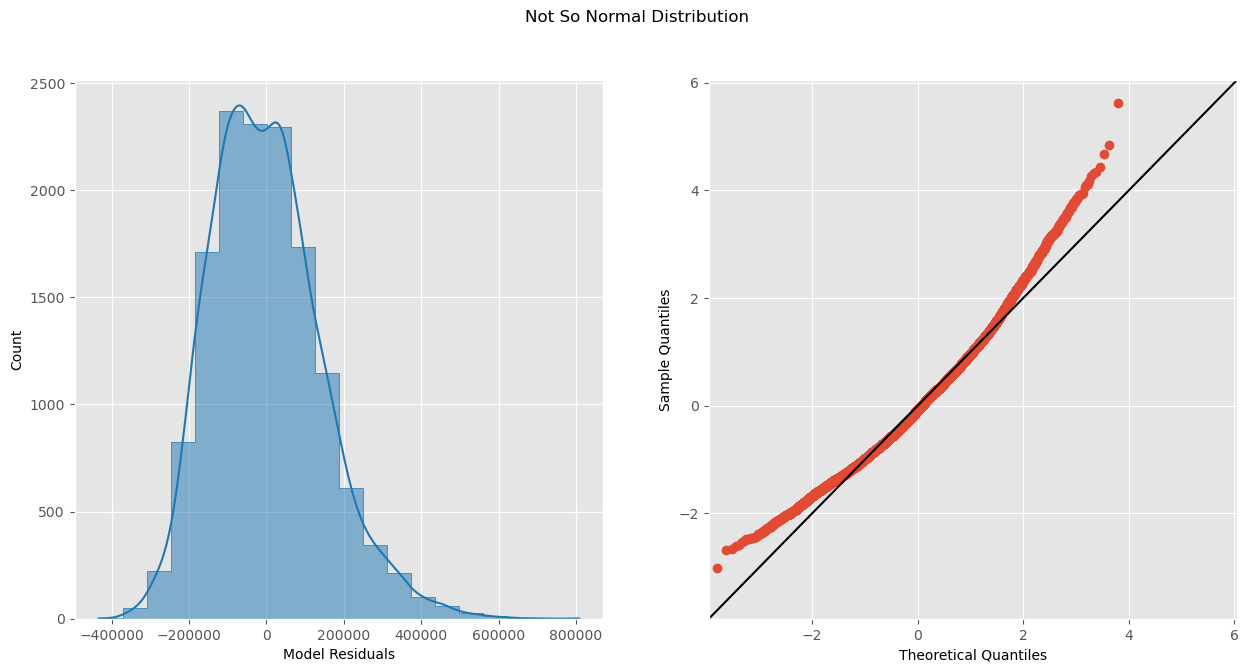

In [73]:
# check for normality of residuals

# plotting the model residual to check for normality of residuals
fig , (ax1,ax2)=plt.subplots(ncols=2, figsize=(15,7))
sns.histplot(model_final.resid, bins=20, element="step", kde=True, ax=ax1,color="tab:blue")
ax1.set_xlabel("Model Residuals")

# Use qqplot function from StatsModels
sm.graphics.qqplot(model_final.resid, dist=stats.norm, line='45', fit=True, ax=ax2)
# Customize plot appearance
line = ax2.lines[1]
line.set_color("black")
fig.suptitle("Not So Normal Distribution")
plt.tight_layout;


From the graphs above, we can assume that the residuals are not faroff from a normal distribution.

In [77]:
# Tsetsing for independence of errors

# performing durbin-watson test to test for independence of errors
durbin_watson_statistic = sm.stats.stattools.durbin_watson(model_final.resid)
print("Durbin-Wason statistic:", durbin_watson_statistic)

Durbin-Wason statistic: 1.9833931184271012


Since our durbin_watson statistic is close to 2, then  **our errors are independent, that is they are not auto-correlated**.

In [80]:
# Testing for homoskedasticity assumption

#testing for homoscedasticity using the Breusch-Pagan test.
print(f" homoskedascticity pvalue: {het_breuschpagan(model_final.resid, sm.add_constant(X_final))}")

 homoskedascticity pvalue: (624.9946904089356, 1.7282017491318545e-123, 43.558523965566145, 1.9017108575661625e-126)


Since the pvalues are very small, we reject the null hypothesis and conclude that **the variance of our residuals is not constant, hence presence of heteroskedasticity**. This means that our estimates of the coefficients are still unbiased but the coefficients are not precise.

## Conslusions
***
Some of the house top selling points are:
* `waterfront` : Houses on a water front, that is houses around lakes, rivers and canals, generally more expensive fetch high market prices then those that don't.
* `view` : Houses with Excellent view from house, Mountains, Cascades, ake / river / creek, and others, have higher prices.
* `condition`: Houses in a very good condition, well maintained and renovated , have high market prices.
* `grade`: Houses with a Better grade , construction interms of interior and exteriour design, correspond to high prices
* `Location`: House locations such as houses from Medina, Merce Island and Bellevue , are generally more expensive than those frome the other locations/cities. This can be due to the fact that, the above cities are all close Seattle the city capital and they posses waterfront properties, and scenic views that as discussed above fetch high market prices for houses.

The final model was much better than the the baseline as it explains 37% of variations in price as compared to 35% in the baseline model. Also using the root mean square error , **our model is off by  `$143,789` USD in a given prediction** which is better than the baselines root mean square error of `$148,607`.

The model is statistically significant at an alpha of 0.05. All the model parameters are statistically significant given an alpha level of 0.05 except `condition_Average` , `condition_Fair` and `condition_Good` which were insignificant.


* **The house price of a house with `3` bedhrooms, `2` bathrooms ,`1,794 sqft ` square feet of living space, `2 ` floors,`233 sqft ` square feet of space of basement and `Average` grade is estimated to be: `$444,860` USD.**

* As we increase number of bedrooms by one from 3 , house price drops by `$18,564` USD.
* As we increase number of bathrooms by one from 2 , house price drops by `$37,731` USD.
* As we increase living space by 1 square foot from 1,974 , house price increase by `$101` USD.
* As we increase number of floors by one from 2 , house price increases by `$25,548` USD.
* As we increase basement space by 1 square foot from 233 sqft , house price increase by `$90` USD.
* As the house grade rises form Average by one level upwards, house price increase by `$8,7890` USD.

* The house price of a house with an `Average` view is `$88,000` as compared without a view.
* The house price of a house with an `Excellent` view is `$213,700` as compared without a view.
* The house price of a house with an `Fair` view is `$89,050` as compared without a view.
* The house price of a house with an `Good` view is `$85,080` as compared without a view.
* The house price of a house with a `Very Good` condition is `$98,780` as compared to a poor condition

Using the root mean square error , **our model is off by $148,607 USD in a given prediction**.

From our mdel we also found that; 
> <font color= #C0392B > **`grade` has the most positive impact on the house price followed by `sqft_living`, `sqft_basement` then `floors`** </font>.
    
> <font color= #C0392B > **`bathrooms` has the most negative on house price followed by `bedrooms`** </font>.

## Recommendations
***
The top selling points of a house that catch high prices are; house on a waterfront, house with an excellent view, house with a very good condition , location of a house majorly in Medina, Merce Island and Bellevue , grade of the house, living and basement space of the house and the number of floors.

A house shoudl be well maintained and renavation, since grade of a house has the most impact / increase on price, therefore a home owner/seller should renovate and upgrade the interior and exteriour design quality of a house

We also found that, as the following faeture increase ; house living space, house basement space and number of floors, the market price of a house also increases.

We noted that the number of bathrooms and bedrooms shoul be kept on average, since as they increase the price of a house drops,

The final model, for house price prediction, explains 39%  of the variations in price with  $148,607 USD off in a given prediction.

## Appendix
The webscraping code for our `City Names.csv` dataset.

In [83]:
# webscraping for names of the zipcode column

import requests
from bs4 import BeautifulSoup


url="https://www.zipcode.com.ng/2022/06/list-of-washington-zip-codes.html"
html_page=requests.get(url)
soup=BeautifulSoup(html_page.content,'html.parser')
container=soup.find('div', class_='table-responsive')
table=container.find_all('tr')

city = []
zipcode = []
county = []
state = []

for column in table[1:]:
    values=[]
    for val in column:
        value=val.text
        values.append(value)
    city.append(values[0])
    zipcode.append(int(values[1]))
    county.append(values[2])
    state.append(values[3])
    
zipcode_names=pd.DataFrame(data=zip(city,zipcode,county,state),columns=['City','zipcode','County','State'])
print(f'Rows: {zipcode_names.shape[0]}')
print(f'Columns: {zipcode_names.shape[1]}')
zipcode_names.head()

(500, 4)


,City,zipcode,County,State
0,Benge,99105,Adams,Washington
1,Ritzville,99169,Adams,Washington
2,Lind,99341,Adams,Washington
3,Othello,99344,Adams,Washington
4,Washtucna,99371,Adams,Washington


In [82]:
# saving the scraped data
zipcode_names.to_csv('data/City Names.csv', index=False)